<a href="https://colab.research.google.com/github/nehaa28/dl/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import re
import numpy as np
import pandas as pd
import spacy
import string
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [2]:
fsa=pd.read_csv('/content/FinancialSentimentAnalysis.csv')

In [3]:
#check the head
fsa.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
#check the info
fsa.info

<bound method DataFrame.info of                                                Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]>

In [5]:
#apply describe methods on created dataframe fsa
fsa.describe

<bound method NDFrame.describe of                                                Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]>

# Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset.

In [6]:
punctuation = string.punctuation
print(punctuation)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

fsa["cleaned_sentence"] = fsa["Sentence"].apply(lambda text: remove_punctuation(text))
fsa['cleaned_sentence'].head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


0    The GeoSolutions technology will leverage Bene...
1    ESI on lows down 150 to 250 BK a real possibility
2    For the last quarter of 2010  Componenta s net...
3    According to the FinnishRussian Chamber of Com...
4    The Swedish buyout firm has sold its remaining...
Name: cleaned_sentence, dtype: object

In [7]:
from string import digits

def remove_digits(text):
    return text.translate(str.maketrans('', '', digits))

fsa["cleaned_sentence"] = fsa["cleaned_sentence"].apply(lambda text: remove_digits(text))
fsa['cleaned_sentence'].head()

0    The GeoSolutions technology will leverage Bene...
1          ESI on lows down  to  BK a real possibility
2    For the last quarter of   Componenta s net sal...
3    According to the FinnishRussian Chamber of Com...
4    The Swedish buyout firm has sold its remaining...
Name: cleaned_sentence, dtype: object

In [8]:
import unicodedata
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

fsa["cleaned_sentence"]  = fsa["cleaned_sentence"].apply(lambda text: remove_accented_chars(text))
fsa["cleaned_sentence"]

0       The GeoSolutions technology will leverage Bene...
1             ESI on lows down  to  BK a real possibility
2       For the last quarter of   Componenta s net sal...
3       According to the FinnishRussian Chamber of Com...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line  the EU...
5840    In the building and home improvement trade  sa...
5841    HELSINKI AFX  KCI Konecranes said it has won a...
Name: cleaned_sentence, Length: 5842, dtype: object

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
print(stopwords)


def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in stopwords])  #List Comprehension


fsa["cleaned_sentence"] = fsa["cleaned_sentence"].apply(lambda text: remove_stopwords(text))
fsa['cleaned_sentence'].head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

0    GeoSolutions technology leverage Benefon GPS s...
1                         ESI lows BK real possibility
2    last quarter Componenta net sales doubled EURm...
3    According FinnishRussian Chamber Commerce majo...
4    Swedish buyout firm sold remaining percent sta...
Name: cleaned_sentence, dtype: object

In [11]:
def remove_whitespace(text):
    return  " ".join(text.split())

fsa["cleaned_sentence"] = fsa["cleaned_sentence"].apply(lambda text: remove_whitespace(text))
fsa["cleaned_sentence"].head()

0    GeoSolutions technology leverage Benefon GPS s...
1                         ESI lows BK real possibility
2    last quarter Componenta net sales doubled EURm...
3    According FinnishRussian Chamber Commerce majo...
4    Swedish buyout firm sold remaining percent sta...
Name: cleaned_sentence, dtype: object

In [12]:
def remove_data(text):
    url_pattern = re.compile(r'[^a-zA-Z\s]')
    return url_pattern.sub(r'', text)

fsa['cleaned_sentence']=fsa['cleaned_sentence'].apply(lambda x: remove_data(x))
fsa['cleaned_sentence']

0       GeoSolutions technology leverage Benefon GPS s...
1                            ESI lows BK real possibility
2       last quarter Componenta net sales doubled EURm...
3       According FinnishRussian Chamber Commerce majo...
4       Swedish buyout firm sold remaining percent sta...
                              ...                        
5837    RISING costs forced packaging producer Huhtama...
5838    Nordic Walking first used summer training meth...
5839    According shipping company Viking Line EU deci...
5840    building home improvement trade sales decrease...
5841    HELSINKI AFX KCI Konecranes said order four ho...
Name: cleaned_sentence, Length: 5842, dtype: object

In [13]:
fsa.head(5)

,Sentence,Sentiment,cleaned_sentence
0,The GeoSolutions technology will leverage Bene...,positive,GeoSolutions technology leverage Benefon GPS s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,ESI lows BK real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter Componenta net sales doubled EURm...
3,According to the Finnish-Russian Chamber of Co...,neutral,According FinnishRussian Chamber Commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,Swedish buyout firm sold remaining percent sta...


In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

fsa["cleaned_sentence"] = fsa["cleaned_sentence"].apply(lambda text: lemmatize_words(text))
fsa['cleaned_sentence'].head()

0    GeoSolutions technology leverage Benefon GPS s...
1                          ESI low BK real possibility
2    last quarter Componenta net sale doubled EURm ...
3    According FinnishRussian Chamber Commerce majo...
4    Swedish buyout firm sold remaining percent sta...
Name: cleaned_sentence, dtype: object

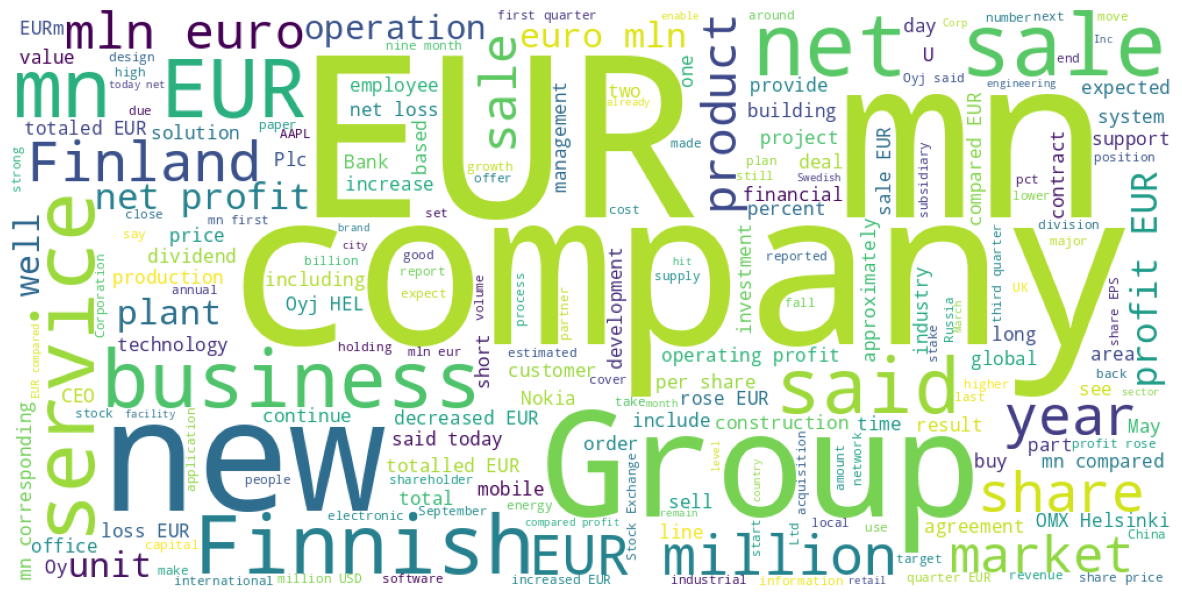

In [18]:
#plot wordcloud
from wordcloud import WordCloud,STOPWORDS

wordcloud= WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(fsa["cleaned_sentence"]))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
label_encoder=preprocessing.LabelEncoder()
fsa['Sentiment']=label_encoder.fit_transform(fsa["Sentiment"])
fsa[['Sentiment']]

,Sentiment
0,2
1,0
2,2
3,1
4,1
...,...
5837,0
5838,1
5839,1
5840,1


# TOKENIZATION

In [20]:
from nltk import sent_tokenize, word_tokenize
var=fsa['cleaned_sentence'].tolist()

var

['GeoSolutions technology leverage Benefon GPS solution providing Location Based Search Technology Communities Platform location relevant multimedia content new powerful commercial model',
 'ESI low BK real possibility',
 'last quarter Componenta net sale doubled EURm EURm period year earlier moved zero pretax profit pretax loss EURm',
 'According FinnishRussian Chamber Commerce major construction company Finland operating Russia',
 'Swedish buyout firm sold remaining percent stake almost eighteen month taking company public Finland',
 'SPY wouldnt surprised see green close',
 'Shells Billion BG Deal Meets Shareholder Skepticism',
 'SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER PM Company update full year outlook estimate result remain loss full year',
 'Kone net sale rose yearonyear first nine month',
 'Stockmann department store total floor space square metre Stockmann investment project price tag EUR million',
 'Circulation revenue increased Finland Sweden',
 'SAP 

In [34]:
import nltk
nltk.download('punkt')
list=[]
for i in var:
    tokens_ = nltk.word_tokenize(i)
    list.append(tokens_)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
list

[['GeoSolutions',
  'technology',
  'leverage',
  'Benefon',
  'GPS',
  'solution',
  'providing',
  'Location',
  'Based',
  'Search',
  'Technology',
  'Communities',
  'Platform',
  'location',
  'relevant',
  'multimedia',
  'content',
  'new',
  'powerful',
  'commercial',
  'model'],
 ['ESI', 'low', 'BK', 'real', 'possibility'],
 ['last',
  'quarter',
  'Componenta',
  'net',
  'sale',
  'doubled',
  'EURm',
  'EURm',
  'period',
  'year',
  'earlier',
  'moved',
  'zero',
  'pretax',
  'profit',
  'pretax',
  'loss',
  'EURm'],
 ['According',
  'FinnishRussian',
  'Chamber',
  'Commerce',
  'major',
  'construction',
  'company',
  'Finland',
  'operating',
  'Russia'],
 ['Swedish',
  'buyout',
  'firm',
  'sold',
  'remaining',
  'percent',
  'stake',
  'almost',
  'eighteen',
  'month',
  'taking',
  'company',
  'public',
  'Finland'],
 ['SPY', 'wouldnt', 'surprised', 'see', 'green', 'close'],
 ['Shells', 'Billion', 'BG', 'Deal', 'Meets', 'Shareholder', 'Skepticism'],
 ['SSH'

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

bow_model = CountVectorizer()
print(bow_model.fit_transform(var))

  (0, 3470)	1
  (0, 8956)	2
  (0, 5145)	1
  (0, 812)	1
  (0, 3560)	1
  (0, 8380)	1
  (0, 7081)	1
  (0, 5258)	2
  (0, 729)	1
  (0, 7967)	1
  (0, 1617)	1
  (0, 6754)	1
  (0, 7431)	1
  (0, 5892)	1
  (0, 1779)	1
  (0, 6010)	1
  (0, 6874)	1
  (0, 1596)	1
  (0, 5782)	1
  (1, 2770)	1
  (1, 5323)	1
  (1, 900)	1
  (1, 7286)	1
  (1, 6849)	1
  (2, 5049)	1
  :	:
  (5840, 7822)	1
  (5840, 2812)	1
  (5840, 1131)	1
  (5840, 5770)	1
  (5840, 9233)	1
  (5840, 2091)	1
  (5840, 3886)	1
  (5840, 4335)	1
  (5841, 3801)	1
  (5841, 5343)	1
  (5841, 3291)	1
  (5841, 7809)	1
  (5841, 8572)	2
  (5841, 841)	1
  (5841, 6337)	1
  (5841, 183)	1
  (5841, 1910)	1
  (5841, 3921)	1
  (5841, 5650)	1
  (5841, 4940)	1
  (5841, 6996)	1
  (5841, 4382)	1
  (5841, 4845)	1
  (5841, 5009)	1
  (5841, 8661)	1


In [37]:
bow_model.vocabulary_

{'geosolutions': 3470,
 'technology': 8956,
 'leverage': 5145,
 'benefon': 812,
 'gps': 3560,
 'solution': 8380,
 'providing': 7081,
 'location': 5258,
 'based': 729,
 'search': 7967,
 'communities': 1617,
 'platform': 6754,
 'relevant': 7431,
 'multimedia': 5892,
 'content': 1779,
 'new': 6010,
 'powerful': 6874,
 'commercial': 1596,
 'model': 5782,
 'esi': 2770,
 'low': 5323,
 'bk': 900,
 'real': 7286,
 'possibility': 6849,
 'last': 5049,
 'quarter': 7161,
 'componenta': 1670,
 'net': 5995,
 'sale': 7822,
 'doubled': 2399,
 'eurm': 2815,
 'period': 6619,
 'year': 10050,
 'earlier': 2486,
 'moved': 5858,
 'zero': 10100,
 'pretax': 6939,
 'profit': 7009,
 'loss': 5308,
 'according': 48,
 'finnishrussian': 3144,
 'chamber': 1374,
 'commerce': 1595,
 'major': 5424,
 'construction': 1760,
 'company': 1637,
 'finland': 3133,
 'operating': 6303,
 'russia': 7766,
 'swedish': 8825,
 'buyout': 1169,
 'firm': 3155,
 'sold': 8372,
 'remaining': 7444,
 'percent': 6611,
 'stake': 8517,
 'almost': 

In [38]:
bow_df = pd.DataFrame(bow_model.fit_transform(var).todense())
bow_df.columns = sorted(bow_model.vocabulary_)
bow_df

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,znga,zoltan,zone,zoo,zs,zsl,zte,zu,zurich,zxx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
fsa.columns

Index(['Sentence', 'Sentiment', 'cleaned_sentence', 'predicted_labels'], dtype='object')

In [40]:
#split the data into x and y
x=bow_df
y=fsa[['Sentiment']]

In [41]:
from sklearn import tree
clf= tree.DecisionTreeClassifier()
clf= clf.fit(x,y)

In [42]:
predicted_labels = clf.predict(x)
print(predicted_labels)

[2 0 2 ... 1 0 2]


In [43]:
clf.predict_proba(bow_df)[:,1]

array([0. , 0. , 0. , ..., 1. , 0.5, 0. ])

In [44]:
fsa['predicted_labels'] = predicted_labels

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(fsa['Sentiment'], fsa['predicted_labels'])*100
print("Accuracy:", accuracy)

Accuracy: 91.11605614515577


In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
error = mean_absolute_error(fsa['Sentiment'],fsa['predicted_labels'])*100
error#error

8.969530982540226

A common pretrained embedding is GloVe, Global Vectors for Word Representation. It has been trained on billions of words from Wikipedia and the Gigaword 5 dataset, more than we could ever hope to train from our movie reviews. After downloading the GloVe embeddings from the GloVe website - https://nlp.stanford.edu/projects/glove/ we can load them into our model:

In [47]:
from tqdm import tqdm
def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(fsa['cleaned_sentence']):
        words=[word.lower() for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus

In [48]:
corpus=create_corpus_new(fsa)

100%|██████████| 5842/5842 [00:00<00:00, 11800.76it/s]


In [49]:
embedding_dict={}
with open('../content/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [50]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [51]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 10135


In [52]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec

100%|██████████| 10135/10135 [00:00<00:00, 487771.33it/s]


In [53]:
tweet_pad[0][0:]

array([3301,   57, 2587, 1124, 1641,   40,  639,  606,  149, 1875,   57,
       4869,  850,  606, 1642, 2588,  472,   19, 3302,  431,  240,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [54]:
#Baseline Model with GloVe results

from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1013600   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,094,101
Trainable params: 80,501
Non-trainable params: 1,013,600
_________________________________________________________________


In [56]:
train=tweet_pad[:fsa.shape[0]]
test=tweet_pad[fsa.shape[0]:]

In [57]:
X_train,X_test,y_train,y_test=train_test_split(train,fsa['Sentiment'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (4673, 50)
Shape of Validation  (1169, 50)


In [58]:
from sklearn.decomposition import PCA, TruncatedSVD

def plot_LSA(test_data, test_labels, savepath="demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})


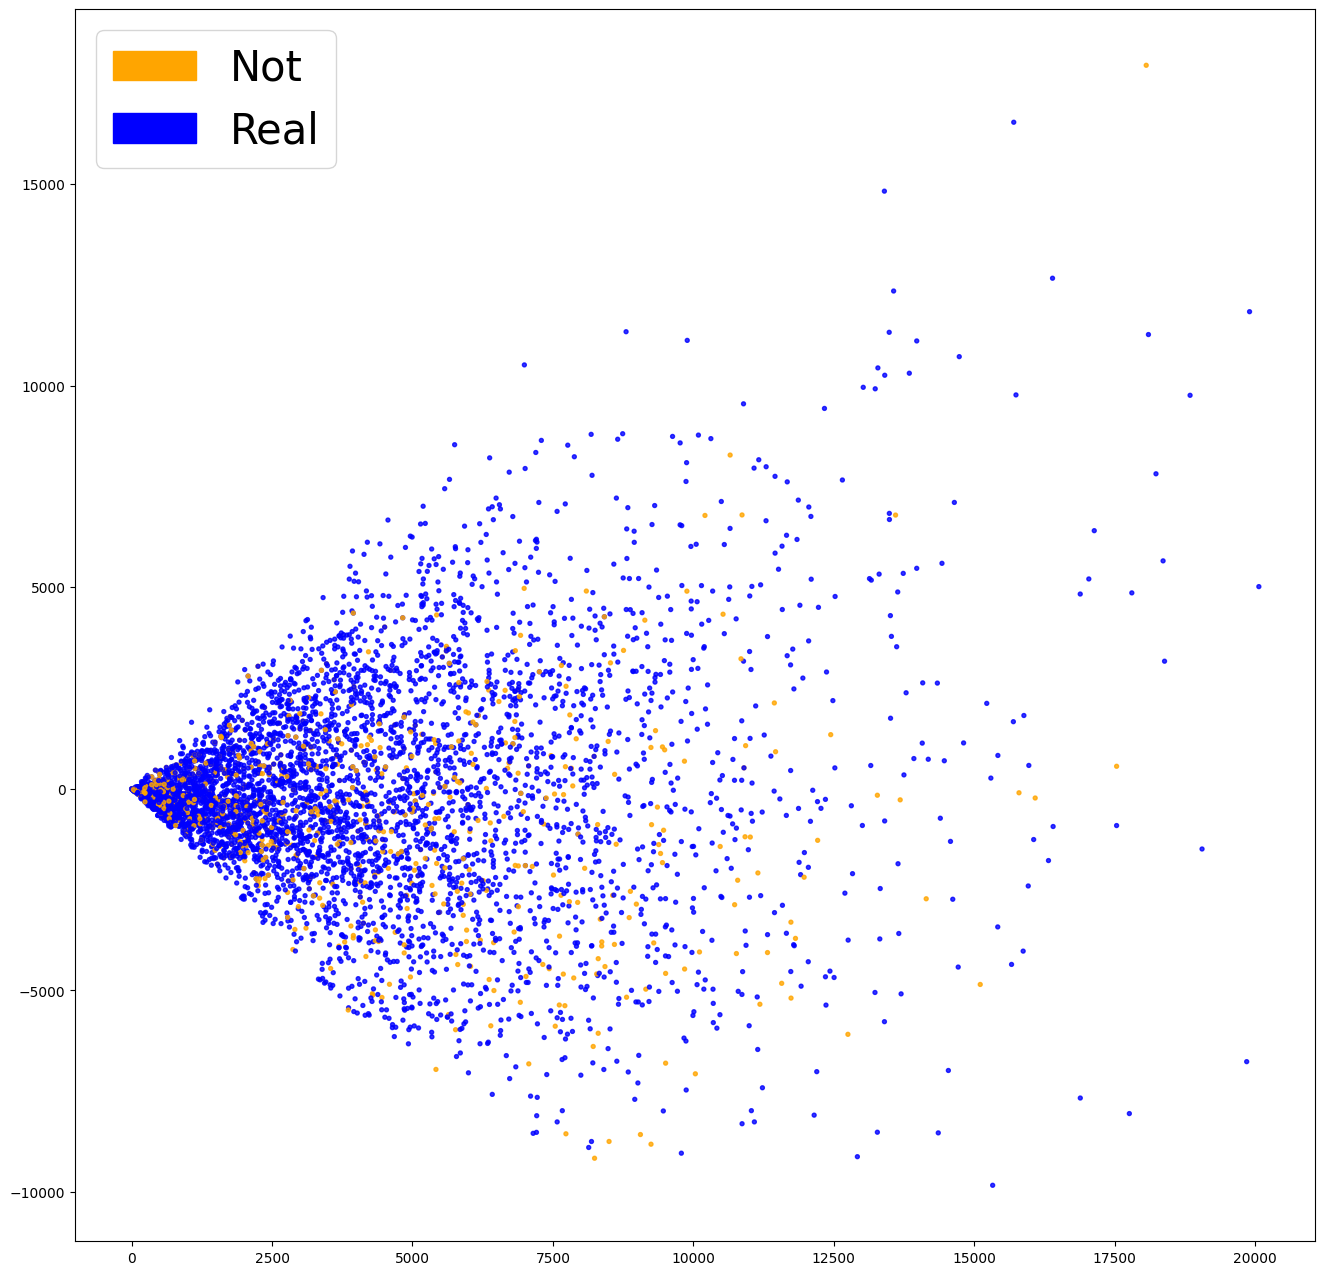

In [59]:
fig = plt.figure(figsize=(16, 16))
plot_LSA(train,fsa['Sentiment'])
plt.show()

In [60]:
# Recomended 10-20 epochs
history=model.fit(X_train,y_train,batch_size=4,epochs=3,validation_data=(X_test,y_test),verbose=2)

Epoch 1/3
1169/1169 - 58s - loss: -3.1302e+00 - accuracy: 0.5350 - val_loss: -5.6073e+00 - val_accuracy: 0.5381 - 58s/epoch - 50ms/step
Epoch 2/3
1169/1169 - 55s - loss: -6.0569e+00 - accuracy: 0.5352 - val_loss: -8.7092e+00 - val_accuracy: 0.5381 - 55s/epoch - 47ms/step
Epoch 3/3
1169/1169 - 55s - loss: -8.6873e+00 - accuracy: 0.5352 - val_loss: -1.1752e+01 - val_accuracy: 0.5381 - 55s/epoch - 47ms/step


In [62]:
train_pred_GloVe = model.predict(train)
train_pred_GloVe_int = train_pred_GloVe.round().astype('int')

test_pred_GloVe = model.predict(X_test)
test_pred_GloVe_int = test_pred_GloVe.round().astype('int')

37/37 [==============================] - 0s 12ms/step


In [63]:
#Report the testing accuracy and loss.
test_loss, test_acc = model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 12ms/step - loss: -11.7520 - accuracy: 0.5381


In [64]:
from sklearn.metrics import confusion_matrix
import numpy as np


# Make predictions using the trained model
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs).astype(int)

# Convert predictions and labels to binary values (0 or 1)
y_pred = np.squeeze(y_pred)
y_test = np.squeeze(y_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


37/37 [==============================] - 0s 12ms/step
Confusion Matrix:
[[  0 157   0]
 [  0 629   0]
 [  0 383   0]]


In [66]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.54      1.00      0.70       629
           2       0.00      0.00      0.00       383

    accuracy                           0.54      1169
   macro avg       0.18      0.33      0.23      1169
weighted avg       0.29      0.54      0.38      1169



In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have the trained GloVe model and the data split into train and test sets

# Extract the GloVe embeddings from the trained model
glove_embeddings = model.predict(X_train)



147/147 [==============================] - 2s 12ms/step


In [73]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(glove_embeddings, y_train)

# Extract GloVe embeddings for the test set
glove_embeddings_test = model.predict(X_test)

# Make predictions on the test set using the Decision Tree classifier
y_pred = dt_model.predict(glove_embeddings_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

37/37 [==============================] - 0s 12ms/step
Confusion Matrix:
[[  0 157   0]
 [  0 629   0]
 [  0 383   0]]


In [74]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.54      1.00      0.70       629
           2       0.00      0.00      0.00       383

    accuracy                           0.54      1169
   macro avg       0.18      0.33      0.23      1169
weighted avg       0.29      0.54      0.38      1169



##Display the HMM POS tagging on the first row of ‘cleaned_sentence’.

In [75]:
fsa['cleaned_sentence'][0]

'GeoSolutions technology leverage Benefon GPS solution providing Location Based Search Technology Communities Platform location relevant multimedia content new powerful commercial model'

In [77]:
import nltk
nltk.download('brown')

# Assuming you have the 'cleaned_sentence' data stored in a variable called cleaned_sentence

# Tokenize the first row of 'cleaned_sentence'
tokens = nltk.word_tokenize(fsa['cleaned_sentence'][0])

# Perform POS tagging using the HMM model
hmm_tagger = nltk.hmm.HiddenMarkovModelTagger.train(nltk.corpus.brown.tagged_sents())
pos_tags = hmm_tagger.tag(tokens)

# Display the POS tags
print("POS Tags:")
print(pos_tags)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


POS Tags:
[('GeoSolutions', 'NIL'), ('technology', 'NIL'), ('leverage', 'NIL'), ('Benefon', 'NIL'), ('GPS', 'NIL'), ('solution', 'NIL'), ('providing', 'NIL'), ('Location', 'NIL'), ('Based', 'NIL'), ('Search', 'NIL'), ('Technology', 'NIL'), ('Communities', 'NIL'), ('Platform', 'NIL'), ('location', 'NIL'), ('relevant', 'NIL'), ('multimedia', 'NIL'), ('content', 'NIL'), ('new', 'JJ'), ('powerful', 'JJ'), ('commercial', 'JJ'), ('model', 'NN')]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Create X and Y objects
X = fsa['cleaned_sentence']
Y = fsa['Sentiment']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Glove object (assuming you have pre-trained GloVe embeddings)
glove = Glove()  # Replace with the appropriate code for GloVe initialization

# Train a Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

# Make predictions on the training and testing sets
Y_train_pred = decision_tree.predict(X_train)
Y_test_pred = decision_tree.predict(X_test)

# Display confusion matrix for train set
cm_train = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix - Train Set:")
print(cm_train)

# Display confusion matrix for test set
cm_test = confusion_matrix(Y_test, Y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(cm_test)
